# Le Méhauté Diagram (1976)

## 說明

### 程式來源

https://github.com/zweihuehner/le-mehaute-diagram

### 說明

This script is designed to give validity to a defined periodic wave according to the theories suggested by Le Méhauté (1976). The limits of the different theories where extracted with help of an image digitizer (https://automeris.io/WebPlotDigitizer/) and saved to an numpy file, which is read by the script. If you have any ideas or suggestions to improve the script, please feel free to add issues or pull requests.

### 基本使用指令

    Example = LeMehauteDiagram()
    Example.add_wave(H=0.11, d=1.682, T=1.42, label="example wave 1") 
    Example.show()
    
### 成果輸出

除了在 notebook 中呈現的圖外，另會儲存圖檔於資料夾中，檔名為 `Example_Diagram.png`。

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

## 主類別 (Class) 程式碼

In [2]:
class LeMehauteDiagram(object):
    """
    Le Mehaute Diagram
    """

    def __init__(self, fig=None, figsize=(12,8), dpi=None):
        """
        Set up Le Mehaute Diagram
        """

        ### Get working directory where script lies

#        wd = os.path.dirname(os.path.abspath(__file__))
        wd = os.getcwd()

        
        ### Init Figure

        if fig is None:
            self.fig = plt.figure("Le Mehaute Diagram", figsize=figsize, dpi=dpi)
        else:
            self.fig = fig
            
        self.ax = self.fig.add_subplot(111)

        ### Preallocation

        self.annotation_list = []

        ### Define Wave theory limits
        
        LeMehauteLines = np.load("{}/LeMehaute.npy".format(wd), allow_pickle=True)
        
        self.line1 = LeMehauteLines[0] # upper limit linear waves
        self.line2 = LeMehauteLines[1] # upper limit second order
        self.line3 = LeMehauteLines[2] # upper limit third order
        self.line4 = LeMehauteLines[3] # upper limit 4th and 5th order
        self.line5 = LeMehauteLines[4] # Cnoidal waves
        self.line6 = LeMehauteLines[5] # Solitary waves
        
        ### Define shallow, intermediate and deep water limits

        lim_s_i = 0.00242087554332614
        lim_i_d = 0.07928081279747913

        ### Define upper limits for linear, 2nd order, 3rd order and 4th/5th order waves 

        lim_1o = np.max(self.line1[:,1])
        lim_2o = np.max(self.line2[:,1])
        lim_3o = np.max(self.line3[:,1])
        lim_4o = np.max(self.line4[:,1])

        ### Define limits of diagram

        lim_left = 0.0001
        lim_right = 1
        lim_top = 0.1
        lim_bot = 0.00001

        ### Add Wave theory limits

        color_wavelimits = (0.3, 0.3, 0.3)
        self.ax.loglog( self.line1[:,0], self.line1[:,1], color=color_wavelimits, linewidth=1.25)
        self.ax.loglog( self.line2[:,0], self.line2[:,1], color=color_wavelimits, linewidth=1.25, ls="--")
        self.ax.loglog( self.line3[:,0], self.line3[:,1], color=color_wavelimits, linewidth=1.25, ls="--")
        self.ax.loglog( self.line4[:,0], self.line4[:,1], color=color_wavelimits, linewidth=1.25)
        self.ax.loglog( self.line5[:,0], self.line5[:,1], color=color_wavelimits, linewidth=1.25)
        self.ax.loglog( self.line6[:,0], self.line6[:,1], color=color_wavelimits, linewidth=1.25)

        ### Add shallow, intermediate and deep water limits

        # color_s = (0.99, 0.99, 0.99)
        # color_i = (0.95, 0.95, 0.95)
        # color_d = (0.91, 0.91, 0.91)
        color_s = (1, 1, 1)
        color_i = (1, 1, 1)
        color_d = (1, 1, 1)
        color_limits = (0.8, 0.8, 0.8)
        color_txt = (0.3, 0.3, 0.3)
        self.ax.axvline(lim_s_i, color=color_limits, ls='--', zorder = 1)
        self.ax.axvline(lim_i_d, color=color_limits, ls='--', zorder = 1)
        self.ax.axvspan(lim_left, lim_s_i, color = color_s, zorder=0 )
        self.ax.axvspan(lim_s_i, lim_i_d, color = color_i, zorder=0 )
        self.ax.axvspan(lim_i_d, lim_right,  color = color_d, zorder=0 )

        ### Add descriptions
        
        self.fs_text = 10 # font size of text

        # ------------------------------------------------------------------
        
        xpos_s = 10**( (np.log10( lim_left ) + np.log10( lim_s_i ) ) / 2 )
        xpos_i = 10**( (np.log10( lim_s_i ) + np.log10( lim_i_d ) ) / 2 )
        xpos_d = 10**( (np.log10( lim_i_d ) + np.log10( lim_right ) ) / 2 )
        ypos_sid = lim_bot * 1.75

        self.ax.text(xpos_s, ypos_sid , 'SHALLOW\nWATER WAVES', ha='center', va='bottom', size = self.fs_text, 
                    bbox = dict(facecolor=color_s, edgecolor=color_s, pad=5), color=color_txt)
        self.ax.annotate('', xy=(lim_s_i, ypos_sid - ypos_sid / 15 ), xytext=(lim_left,  ypos_sid - ypos_sid / 15 ), 
                    arrowprops=dict(color=color_txt, lw=1, arrowstyle='<->'), zorder=10)
        self.ax.text(xpos_i, ypos_sid , 'INTERMEDIATE WATER\nWAVES', ha='center', va='bottom', size = self.fs_text, 
                    bbox = dict(facecolor=color_i, edgecolor=color_i, pad=5), color=color_txt)
        self.ax.annotate('', xy=(lim_i_d, ypos_sid - ypos_sid / 15 ), xytext=(lim_s_i,  ypos_sid - ypos_sid / 15 ), 
                    arrowprops=dict(color=color_txt, lw=1, arrowstyle='<->'), zorder=10)
        self.ax.text(xpos_d, ypos_sid , 'DEEP WATER\nWAVES', ha='center', va='bottom', size = self.fs_text,
                    bbox = dict(facecolor=color_d, edgecolor=color_d, pad=5), color=color_txt)
        self.ax.annotate('', xy=(lim_right, ypos_sid - ypos_sid / 15 ), xytext=(lim_i_d,  ypos_sid - ypos_sid / 15 ), 
                    arrowprops=dict(color=color_txt, lw=1, arrowstyle='<->'), zorder=10)

        # ------------------------------------------------------------------

        ypos_1o = 10**( ( np.log10( lim_bot ) + np.log10( lim_1o ) ) / 2 )
        ypos_2o = 10**( ( np.log10( lim_1o ) + np.log10( lim_2o ) ) / 2 )
        ypos_3o = 10**( ( np.log10( lim_2o ) + np.log10( lim_3o ) ) / 2 )
        ypos_4o = 10**( ( np.log10( lim_3o ) + np.log10( lim_4o ) ) / 2 )
        xpos_o = lim_right * 0.9

        self.ax.text(lim_i_d, ypos_1o , 'LINEAR WAVE THEORY\n(AIRY)', ha='center', va='center', size = self.fs_text,
                    bbox = dict(facecolor=color_s, edgecolor=color_s, pad=5), color=color_txt)
        self.ax.text(xpos_o, ypos_2o , 'STOKES 2nd ORDER', ha='right', va='center', size = self.fs_text, color=color_txt)
        self.ax.text(xpos_o, ypos_3o , 'STOKES 3rd ORDER', ha='right', va='center', size = self.fs_text, color=color_txt)
        self.ax.text(xpos_o, ypos_4o , 'STOKES 4th or 5th ORDER', ha='right', va='center', size = self.fs_text, color=color_txt)
        
        # ------------------------------------------------------------------
        
        xpos0_sol = self.line6[3,0]
        xpos1_sol = self.line6[8,0] 
        ypos0_sol = self.line6[3,1] + 0.065 * self.line6[3,1]
        ypos1_sol = self.line6[8,1] + 0.065 * self.line6[8,1]
        rot_sol = np.degrees(np.arctan2(ypos1_sol - ypos0_sol, xpos1_sol - xpos0_sol)) 

        self.ax.text(xpos1_sol, ypos1_sol, "SOLITARY WAVE THEORY", ha='center', va='bottom', size=self.fs_text,
                rotation=rot_sol, rotation_mode='anchor', transform_rotates_text=True, color=color_txt)
        
        # ------------------------------------------------------------------

        xpos_cnoidal = 10**( (np.log10( lim_left ) + np.log10( lim_s_i ) ) / 2 ) * 2.1
        ypos_cnoidal = lim_bot * 20

        self.ax.text(xpos_cnoidal, ypos_cnoidal, "CNOIDAL\nWAVES", ha='center', va='center', size=self.fs_text, color=color_txt)
        
        # ------------------------------------------------------------------
        
        ypos0_break_s = self.line4[12,1]
        ypos1_break_s = 0.01
        xpos0_break_s = self.line4[12,1]
        xpos1_break_s = xpos_s

        plt.annotate("BREAKING CRITERION\n(SOLITARY WAVE)\n"r"$\mathrm{\frac{H}{d}=0.78}}$", xy=(xpos0_break_s,  ypos0_break_s ), 
                    xytext=(xpos1_break_s, ypos1_break_s ), color=color_txt,
                    arrowprops=dict(color=color_txt, lw=1, arrowstyle='->'), zorder=10, ha='center')

        # ------------------------------------------------------------------

        ypos0_break_d = 0.035
        ypos1_break_d = 0.035
        xpos0_break_d = xpos_d
        xpos1_break_d = xpos_i

        plt.annotate("DEEP WATER\nBREAKING CRITERION\n"r"$\mathrm{\frac{H}{\lambda}=0.142}}$", xy=(xpos0_break_d,  ypos0_break_d ), 
                    xytext=(xpos1_break_d, ypos1_break_d ), color=color_txt,
                    arrowprops=dict(color=color_txt, lw=1, arrowstyle='->'), zorder=10, ha='center')

        ### Formatting

        self.fs_axlabel = 18 # font size of axis labels
        self.ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
        self.ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
        self.ax.minorticks_off()
        y_ticks = self.ax.yaxis.get_major_ticks()
        y_ticks[1].label.set_visible(False)
        self.ax.set_xlim([lim_left, lim_right])
        self.ax.set_ylim([lim_bot, lim_top])
        self.ax.set_xlabel(r'$\mathrm{\frac{d}{gT^2}}$', size=self.fs_axlabel)
        self.ax.set_ylabel(r'$\mathrm{\frac{H}{gT^2}}$', rotation=0, size=self.fs_axlabel)

        
    def add_wave(self, d=None, T=None, H=None, label=None, color="orange", marker="v", mec="black", markersize=50):
        """
        Add a wave to the Diagramm
        """ 

        x = d / (9.81 * T**2)
        y = H / (9.81 * T**2)

        self.ax.scatter(x, y, label=label, marker=marker, color=color, edgecolor=mec, s=markersize)
        
        annotation = self.ax.annotate(label, xy=(x, y - 0.2 * y), zorder=10, weight='bold', ha="center", va="top", fontsize=9)

        self.annotation_list.append(annotation)

    def legend(self, loc="best"):
        """
        Adds a legend to the plot
        """

        ### if legend is enabled, delete annotations in plot
        for annot in self.annotation_list:
            annot.remove()

        self.ax.legend(loc=loc)
    
    def show(self):
        """
        Show the plot
        """

        plt.show()

## 使用範例

設定 example wave 1 為

* 水深 d = 1.682 m
* 週期 T = 1.42 s
* 波高 H = 0.11 m

並以上述設定為基礎，修改波高、水深或週期，另外設定三個波浪條件 example wave 2 ~ 3。

/var/folders/v0/7kls2dh96h12cvg8vkt785zm0000gn/T/ipykernel_54704/2305901024.py:171: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  y_ticks[1].label.set_visible(False)


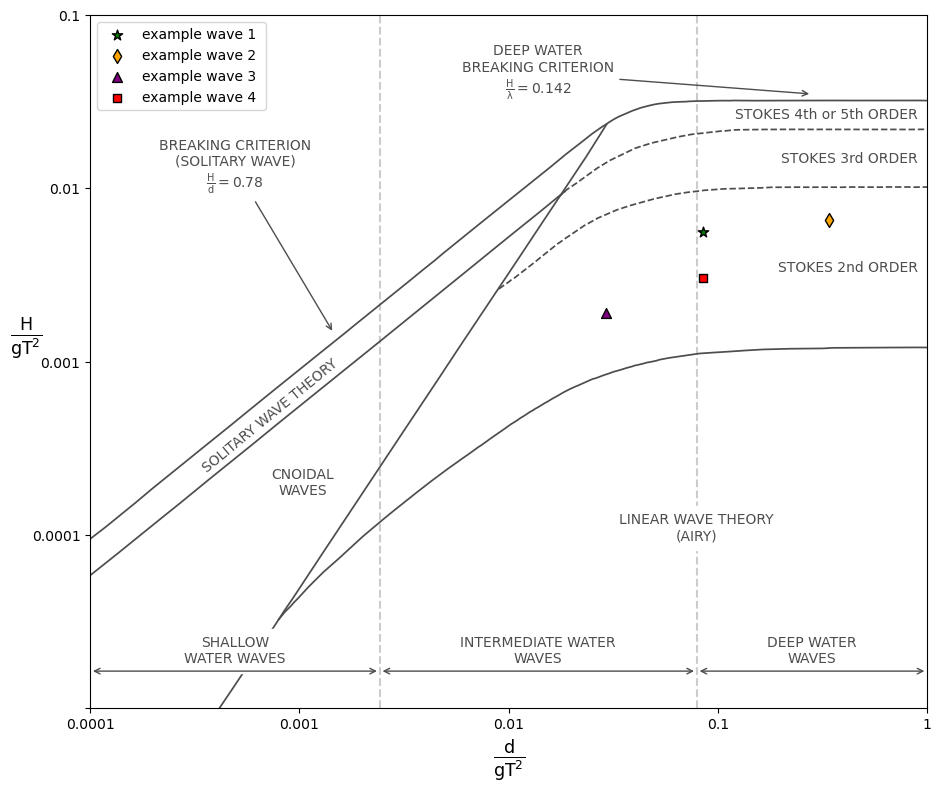

In [3]:
# 設定波浪條件
d = 1.682
T = 1.42
H = 0.11

# 設定繪圖尺寸與精度
Example = LeMehauteDiagram(figsize=(12*0.9,10*0.9), dpi=100)

# 依序加入各波浪條件之圖
Example.add_wave(H=H, d=d, T=T, label="example wave 1", color="green", marker="*", mec="black", markersize=60) 
Example.add_wave(H=H+0.02, d=d+5, T=T, label="example wave 2", color="orange", marker="d", mec="black", markersize=50) 
Example.add_wave(H=H, d=d, T=T+1, label="example wave 3", color="purple", marker="^", mec="black", markersize=50) 
Example.add_wave(H=H-0.05, d=d, T=T, label="example wave 4 ", color=(1.0, 0.0, 0.0), marker="s", mec="black", markersize=40) 

# 設定圖示在左上方
Example.legend(loc="upper left")
plt.savefig("Example_Diagram.png", bbox_inches="tight")
plt.show()